In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [36]:
#noise parameter
mean = 0
std = 0.07

def gen(num):   #function to generate data
    x = np.array(np.random.rand(num))
    y = np.zeros(num)
    for i in range (num):
        noise = np.random.normal(mean, std)
        y[i] = (math.sin(2 * math.pi * x[i]))** 2 + noise
    return x,y

In [37]:
#generate training data
x,y = gen(30)

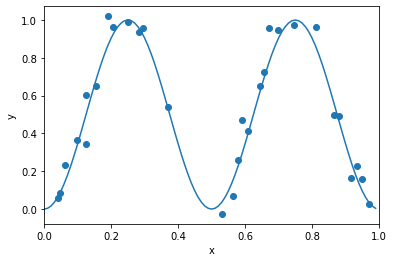

In [38]:
#Ans 2a i 
#plot the function


#configuration of plot
plt.xlim(0,1)
#plt.ylim(0,1.5)
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(x,y)   #scatter plot of data

#plot sin
a = np.arange(0,1,0.01)
b = np.zeros(100)
for i in range (100):
    b[i] = math.sin(2 * math.pi * a[i]) ** 2
plt.plot(a,b)


In [39]:
#model from CW_1
def model(x,k):
    model_entry = np.zeros(shape=(len(x),k))   #initiate model matrix
    #set in model
    column_num = 0   #matrix column number
    for element in (x):
        row_vector = []
        for i in range(k):     
            row_vector.append(element ** i)   #quadratic model
        model_entry[column_num] = row_vector 
        column_num = column_num + 1
    return model_entry 

def fit_para(x,y,k):   #calculate parameter vector
    model_ini = model(x,k)
    model_transpose = np.transpose(model_ini)
    product_1 = np.matmul(model_transpose,model_ini)
    inverse = np.linalg.pinv(product_1)
    product_2 = np.matmul(inverse, model_transpose)
    return np.matmul(product_2, y)

#plot the graph_yvalues wrt each k
def graph_yvalue(parameter, k):
    #create vectors of a and b for model
    a = np.arange(0,1,0.01)
    b = []
    for element in (a):
        b_value = 0
        for i in range (k):
            b_value += parameter[i] * (element ** i)   #parameter[i] is the i-th entry of parameter vector
        b.append(b_value)    
    return b

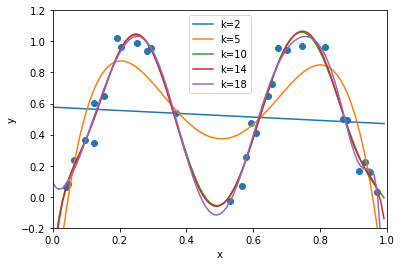

In [40]:
#Ans 2a ii


para2_1 = fit_para(x,y,k=2)   #models with different k
para2_2 = fit_para(x,y,k=5)
para2_3 = fit_para(x,y,k=10)
para2_4 = fit_para(x,y,k=14)
para2_5 = fit_para(x,y,k=18)

#configuration of plot
plt.xlim(0,1)
plt.ylim(-0.2,1.2)
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(x,y)   #scatter plot of data

x_value = np.arange(0,1,0.01)   #sample x points to generate linear regression
plt.plot(x_value, graph_yvalue(para2_1,k=2))
plt.plot(x_value, graph_yvalue(para2_2,k=5))
plt.plot(x_value, graph_yvalue(para2_3,k=10))
plt.plot(x_value, graph_yvalue(para2_4,k=14))
plt.plot(x_value, graph_yvalue(para2_5,k=18))

#plt.axhline(y=0, color='k', linestyle='--')   #axis line

plt.legend(labels = ['k=2','k=5','k=10','k=14','k=18'])
plt.show()

In [41]:
#calculate MSE from CW_1

def mse(m,n,k):
    feature_map = model(m,k)   #feature_map can include test data
    sum_of_square = 0
    para = fit_para(x,y,k)   #para vector only rely on training data
    for i in range (len(m)):
        sum_of_square = sum_of_square + np.square(n[i] - np.matmul(feature_map[i], para))
    return sum_of_square/len(m)


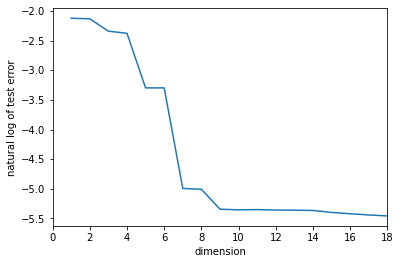

In [42]:
#Ans 2b

err = []
dim = []

for k in range (1,19):   #k from 1 to 18
    dim.append(k)   
    error = mse(x,y,k)   
    logerr = math.log(error)
    err.append(logerr)

plt.xlim(0,18)
plt.plot(dim,err)    
plt.xlabel('dimension')
plt.ylabel('natural log of test error')    
plt.show()

In [43]:
#generate test data
m,n = gen(1000)

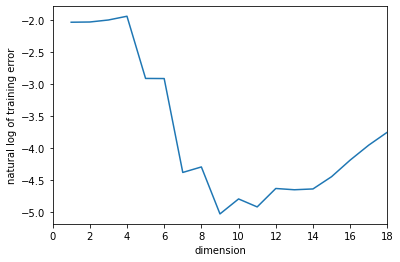

In [44]:
#Ans 2c

err = []
dim = []

for k in range (1,19):   #k from 1 to 18
    dim.append(k)   
    error = mse(m,n,k)   
    logerr = np.log(error)
    err.append(logerr)

plt.xlim(0,18)
plt.plot(dim,err)    
plt.xlabel('dimension')
plt.ylabel('natural log of training error')    
plt.show()

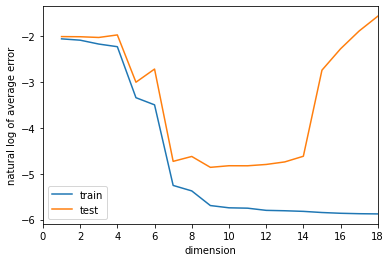

In [45]:
#Ans 2d


#100 runs on training data
err = np.zeros(shape=(100 , 18))

for i in range (100):
    x,y = gen(30)   #generate new training data
    dim = []
    for k in range (1,19):      #k from 1 to 18
        dim.append(k)
        error = mse(x,y,k)   
        err[i][k-1]=error

err_avg = np.mean(err, axis=0)
logerr = np.log(err_avg)
        
#plt.xlim(0,18)
plt.plot(dim,logerr)    
#plt.xlabel('dimension')
#plt.ylabel('natural log of average training error with 30 data and 100 runs')    



#100 runs on test data
err = np.zeros(shape=(100 , 18))

for i in range (100):
    m,n = gen(1000)   #generate new test data
    dim = []
    for k in range (1,19):      #k from 1 to 18
        dim.append(k)
        error = mse(m,n,k)   
        err[i][k-1]=error

err_avg = np.mean(err, axis=0)
logerr = np.log(err_avg)
        
plt.xlim(0,18)
plt.plot(dim,logerr)    
plt.xlabel('dimension')
plt.ylabel('natural log of average error') 
plt.legend(labels = ['train','test'])
plt.show()

In [46]:
#model change basis
def model_3(x,k):
    model_entry = np.zeros(shape=(len(x),k))   #initiate model matrix
    #set in model
    column_num = 0   #matrix column number
    for element in (x):
        row_vector = []
        for i in range(k):     
            row_vector.append(math.sin((i+1) * math.pi * element))   #quadratic model
        model_entry[column_num] = row_vector 
        column_num = column_num + 1
    return model_entry 

def fit_para_3(x,y,k):   #calculate parameter vector
    model_ini = model_3(x,k)
    model_transpose = np.transpose(model_ini)
    product_1 = np.matmul(model_transpose,model_ini)
    inverse = np.linalg.pinv(product_1)
    product_2 = np.matmul(inverse, model_transpose)
    return np.matmul(product_2, y)

#plot the graph_yvalues wrt each k
def graph_yvalue_3(parameter, k):
    #create vectors of a and b for model
    a = np.arange(0,1,0.01)
    b = []
    for element in (a):
        b_value = 0
        for i in range (k):
            b_value += parameter[i] * (math.sin((i+1) * math.pi * element))   #parameter[i] is the i-th entry of parameter-matrix 
        b.append(b_value)    
    return b

#MSE
def mse_3(m,n,k):
    feature_map_3 = model_3(m,k)   #feature_map can include test data
    para = fit_para_3(x,y,k)
    sum_of_square = 0
    for i in range (len(m)):
        sum_of_square += np.square(n[i] - np.matmul(feature_map_3[i], para))   #para only rely on training data
    return sum_of_square/len(m)

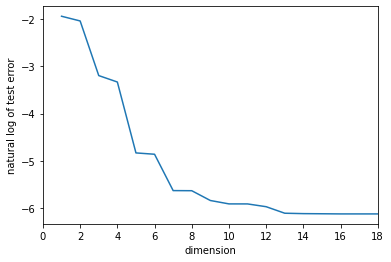

In [47]:
#Ans 3b

err = []
dim = []

for k in range (1,19):      #k from 1 to 18
    dim.append(k)
    error = mse_3(x,y,k)   
    logerr = math.log(error)
    err.append(logerr)

plt.xlim(0,18)
plt.plot(dim,err)    
plt.xlabel('dimension')
plt.ylabel('natural log of test error')    
plt.show()

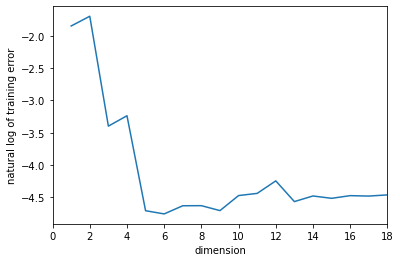

In [48]:
#Ans 3c

err = []
dim = []

for k in range (1, 19):      #k from 1 to 18
    dim.append(k)
    error = mse_3(m,n,k)   
    logerr = math.log(error)
    err.append(logerr)

plt.xlim(0,18)
plt.plot(dim,err)    
plt.xlabel('dimension')
plt.ylabel('natural log of training error')    
plt.show()

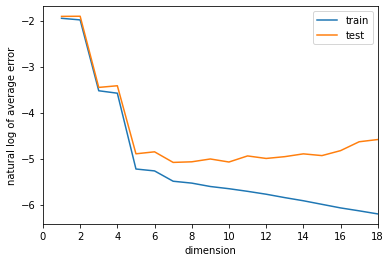

In [49]:
#Ans 3d


#100 runs on training data
err = np.zeros(shape=(100 , 18))

for i in range (100):
    x,y = gen(30)   #generate new training data
    dim = []
    for k in range (1, 19):
        dim.append(k)
        error = mse_3(x,y,k)   
        err[i][k-1]=error

err_avg = np.mean(err, axis=0)
logerr = np.log(err_avg)
        
plt.xlim(0,18)
plt.plot(dim,logerr)    
#plt.xlabel('dimension')
#plt.ylabel('natural log of average training error with 30 data and 100 runs')    
#plt.show()


#100 runs on test data
err = np.zeros(shape=(100 , 18))

for i in range (100):
    m,n = gen(1000)   #generate new test data
    dim = []
    for k in range (1,19):
        dim.append(k)
        error = mse_3(m,n,k)   
        err[i][k-1]=error

err_avg = np.mean(err, axis=0)
logerr = np.log(err_avg)
        
plt.xlim(0,18)
plt.plot(dim,logerr)    
plt.xlabel('dimension')
plt.ylabel('natural log of average error') 
plt.legend(labels = ['train','test'])
plt.show()